In [67]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize']= (10,9)
mpl.rcParams['axes.grid'] = False

In [68]:
df1 = pd.read_csv("C:/Users/thaku/Downloads/m23/time_series/Data/ecg/ECG5000_TRAIN.txt",sep = '  ', header = None)
df2 = pd.read_csv("C:/Users/thaku/Downloads/m23/time_series/Data/ecg/ECG5000_TRAIN.txt",sep = '  ', header = None)
df = pd.concat([df1,df2],axis = 0)

# combining the fulls et for now

C:\Users\thaku\AppData\Local\Temp\ipykernel_24480\2789692666.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("C:/Users/thaku/Downloads/m23/time_series/Data/ecg/ECG5000_TRAIN.txt",sep = '  ', header = None)
C:\Users\thaku\AppData\Local\Temp\ipykernel_24480\2789692666.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("C:/Users/thaku/Downloads/m23/time_series/Data/ecg/ECG5000_TRAIN.txt",sep = '  ', header = None)


In [69]:
df.shape

(1000, 141)

In [70]:
## 140 columns for heart activity and first one is target column

In [71]:
# 1 normal activity 
## 2 3 4 5 irrregular activity

In [72]:
 df.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
      dtype='int64', length=141)

In [73]:
## when columns in this format cannot slice 
# dice it 

In [74]:
df =df.add_prefix('c')

In [75]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [76]:
df['c0'].value_counts()

c0
1.0    584
2.0    354
4.0     38
3.0     20
5.0      4
Name: count, dtype: int64

In [77]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.524000,-0.159100,-1.551951,-2.442733,-3.098292,-3.177269,-2.899259,-2.286133,-1.800159,-1.429717,...,0.146861,0.049037,-0.085459,-0.300097,-0.552943,-0.825774,-0.929637,-0.750090,-0.602488,-0.805451
std,0.752323,1.139721,1.415612,1.399443,1.324919,1.127480,0.904149,0.696785,0.575437,0.587616,...,1.132065,1.352772,1.593825,1.856243,2.024409,2.075665,2.105117,1.954957,1.945664,1.437675
min,1.000000,-3.694197,-5.117621,-5.110389,-5.060774,-5.375715,-5.056184,-3.960660,-3.066900,-2.906713,...,-3.072255,-3.560666,-4.006379,-4.212592,-4.526051,-5.150100,-4.872557,-4.959774,-5.639460,-5.797645
25%,1.000000,-0.928707,-2.644930,-3.617218,-4.251520,-4.022823,-3.537361,-2.779345,-2.182877,-1.786397,...,-0.608483,-0.965218,-1.485576,-2.038443,-2.654917,-3.075720,-3.032576,-2.315601,-1.970478,-1.663648
50%,1.000000,-0.216883,-1.539340,-2.513000,-3.309532,-3.541513,-3.008340,-2.298235,-1.761069,-1.438962,...,0.348091,0.438875,0.652819,0.585367,0.320551,-0.125691,-0.254106,-0.292570,-0.233793,-0.663025
75%,2.000000,0.582008,-0.595632,-1.448769,-2.199136,-2.546305,-2.432860,-1.847942,-1.489967,-1.108815,...,1.046332,1.147758,1.215568,1.239330,1.186627,1.016514,0.933622,0.960665,1.002865,0.222464
max,5.000000,4.058127,2.087844,1.592974,1.423006,1.014557,0.610640,0.778013,0.812531,1.136212,...,2.960969,2.602337,2.723053,2.912394,2.630759,2.852050,2.959741,2.613987,2.589474,2.854707


In [84]:
train_data, test_data,train_labels, test_labels = train_test_split(df.values, df.iloc[:,0:1], test_size = 0.20, random_state = 111)

In [85]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [87]:
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [88]:
train_data_scaled

array([[0.        , 0.26142692, 0.28888606, ..., 0.61139234, 0.5177304 ,
        0.35523136],
       [0.        , 0.53979549, 0.44455341, ..., 0.798358  , 0.85581812,
        0.62573513],
       [0.        , 0.38682566, 0.43255449, ..., 0.46510893, 0.43957808,
        0.30290159],
       ...,
       [0.75      , 0.53961242, 0.64561975, ..., 0.06611578, 0.13146975,
        0.29718214],
       [0.25      , 0.47503778, 0.52069104, ..., 0.44215632, 0.55941282,
        0.69506238],
       [0.25      , 0.59433085, 0.69567559, ..., 0.28848953, 0.42035015,
        0.6143503 ]])

In [100]:
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]                            

In [101]:
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]                            

In [102]:
print(anomaly_train_data.shape)
print(normal_train_data.shape)

(331, 140)
(469, 140)


In [103]:
print(normal_test_data.shape)
print(anomaly_test_data.shape)

(115, 140)
(85, 140)


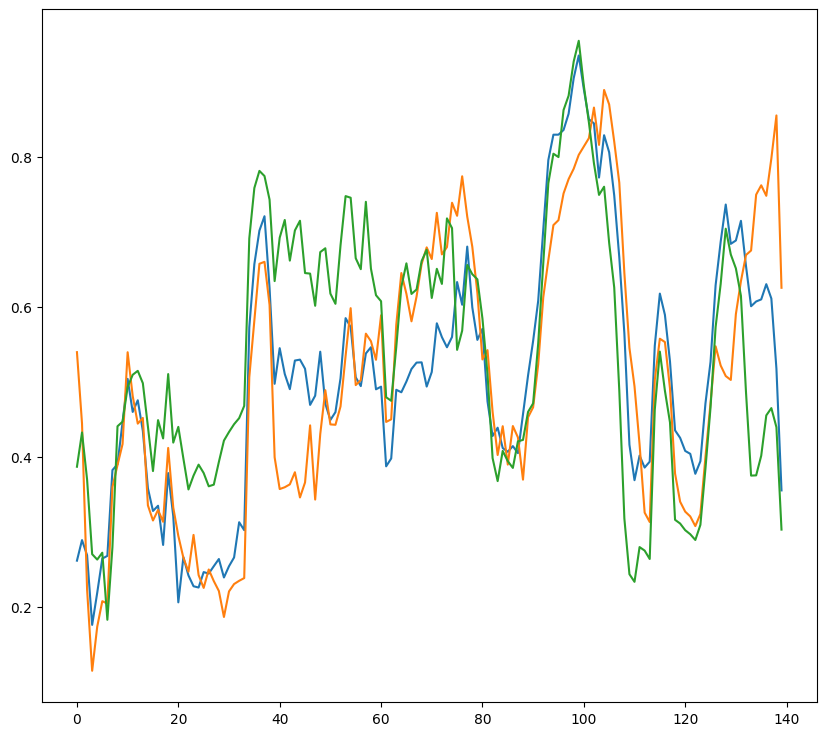

In [106]:
## anomlay not to be used for training used for validation and inference only
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

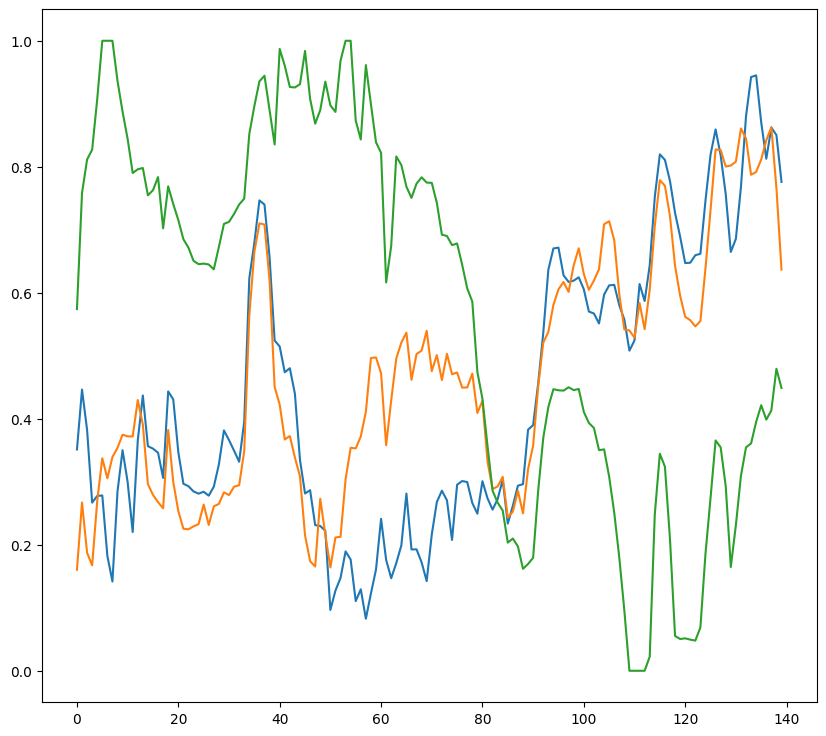

In [107]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [ ]:
model = tf.keras.sequential()
model.add
